## WebScrapping

In [244]:
# importing modules 
import requests 
from bs4 import BeautifulSoup 
  
# URL for scrapping data 
url = 'https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/'
  
# get URL html 
page = requests.get(url) 
soup = BeautifulSoup(page.text, 'html.parser') 
  
data = [] 
  
# soup.find_all('td') will scrape every element in the url's table 
data_iterator = iter(soup.find_all('td'))  
# data_iterator is the iterator of the table 
  
# This loop will keep repeating till there is data available in the iterator 
while True: 
    try: 
        country = next(data_iterator).text 
        confirmed = next(data_iterator).text 
        deaths = next(data_iterator).text 
        continent = next(data_iterator).text 
  
        # For 'confirmed' and 'deaths', make sure to remove the commas and convert to int 
        data.append(( 
            country, 
            (confirmed.replace(', ', '')), 
            (deaths.replace(',', '')), 
            continent
        )) 
    # StopIteration error is raised when there are no more elements left to iterate through 
    except StopIteration: 
        break

In [245]:
# Sort the data by the number of confirmed cases 
data.sort(key = lambda row: row[1], reverse = True) 


## Data Cleaning 

In [246]:
import pandas as pd

In [247]:
dff=pd.DataFrame(data,columns=['country','Number of cases','Deaths','Continment'],dtype=float)
dff.head()

,country,Number of cases,Deaths,Continment
0,Cyprus,988,19.0,Asia
1,Barbados,97,7.0,North America
2,Yemen,967,257.0,Asia
3,Cabo Verde,944,8.0,Africa
4,Georgia,911,14.0,Asia


In [248]:
dff['Number of cases'] = [x.replace(',', '') for x in dff['Number of cases']]


In [249]:
dff['Number of cases'] = pd.to_numeric(dff['Number of cases'])

In [250]:
dff

,country,Number of cases,Deaths,Continment
0,Cyprus,988,19.0,Asia
1,Barbados,97,7.0,North America
2,Yemen,967,257.0,Asia
3,Cabo Verde,944,8.0,Africa
4,Georgia,911,14.0,Asia
...,...,...,...,...
209,Congo,1087,37.0,Africa
210,State of Palestine,1078,3.0,Asia
211,Niger,1046,67.0,Africa
212,Jordan,1042,9.0,Asia


In [251]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 4 columns):
country            214 non-null object
Number of cases    214 non-null int64
Deaths             214 non-null float64
Continment         214 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 6.8+ KB


In [252]:
dfff=dff.sort_values(by='Number of cases',ascending=False)


In [253]:
dfff['Death_rate']= (dfff['Deaths']/dfff['Number of cases'])*100
dfff.head()

,country,Number of cases,Deaths,Continment,Death_rate
130,United States,2388225,122611.0,North America,5.133980
207,Brazil,1111348,51407.0,South America,4.625644
44,Russia,599705,8359.0,Europe,1.393852
63,India,441924,14028.0,Asia,3.174301
90,United Kingdom,305289,42647.0,Europe,13.969386


## Data Visualization

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt

In [255]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

C:\Users\Prabhat.Pathak\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Prabhat.Pathak\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Figure size 1600x480 with 0 Axes>

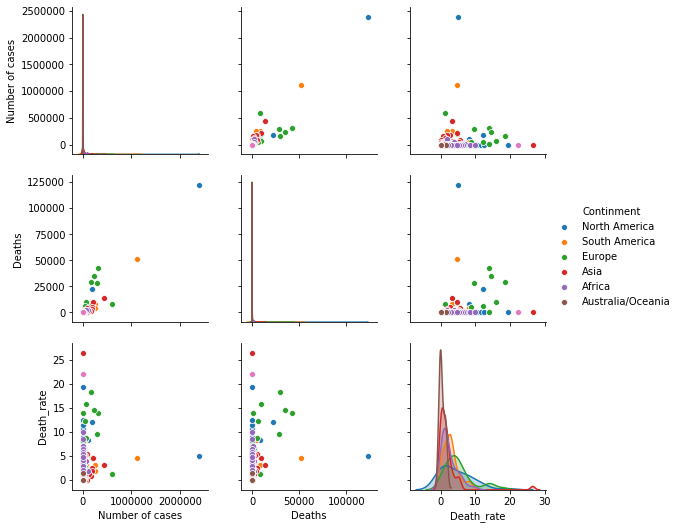

In [256]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
sns.pairplot(dfff,hue='Continment')

In [257]:
dfff.corr()

,Number of cases,Deaths,Death_rate
Number of cases,1.000000,0.931793,0.094185
Deaths,0.931793,1.000000,0.244252
Death_rate,0.094185,0.244252,1.000000


In [258]:
dfff.columns

Index(['country', 'Number of cases', 'Deaths', 'Continment', 'Death_rate'], dtype='object')

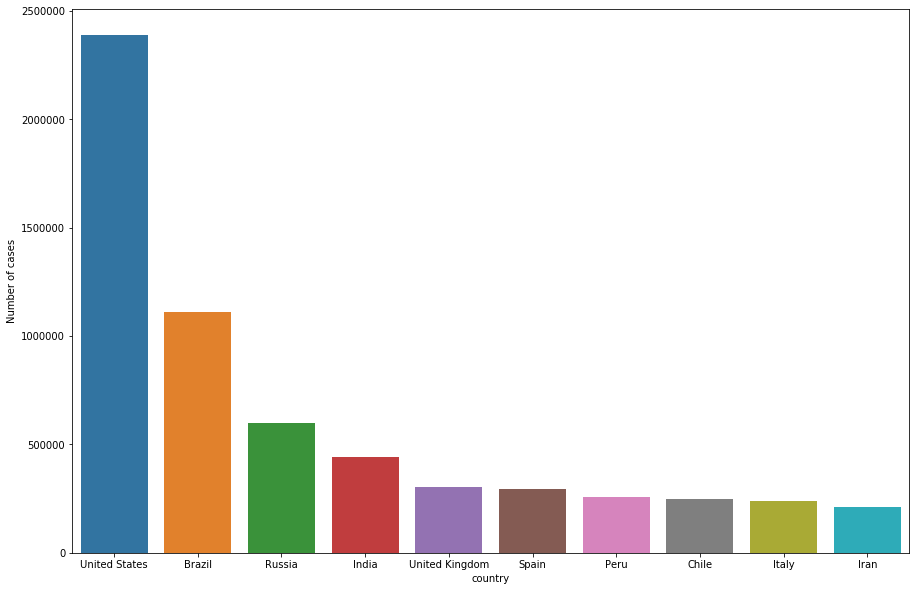

In [259]:
sns.barplot(x='country',y='Number of cases',data=dfff.head(10))


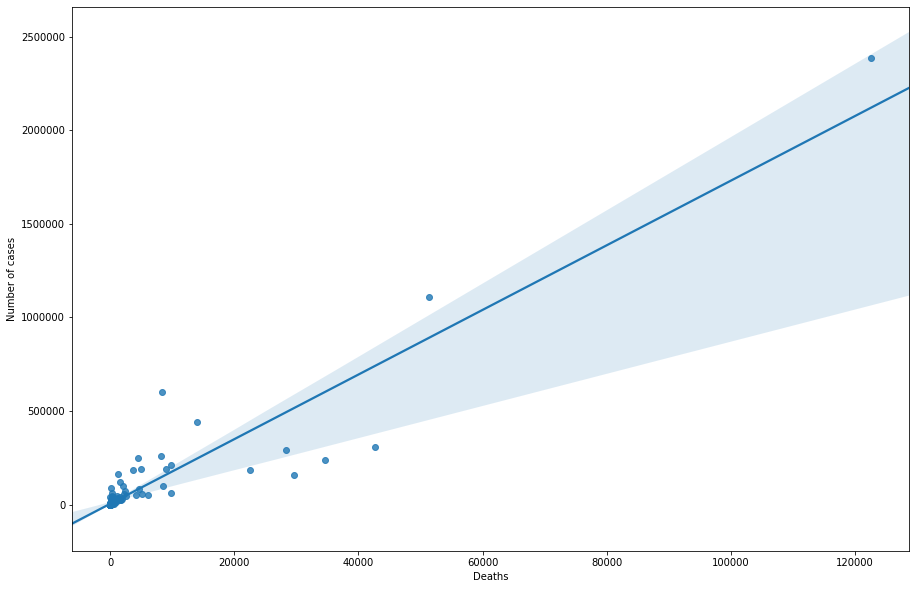

In [260]:
sns.regplot(x='Deaths',y='Number of cases',data=dfff)


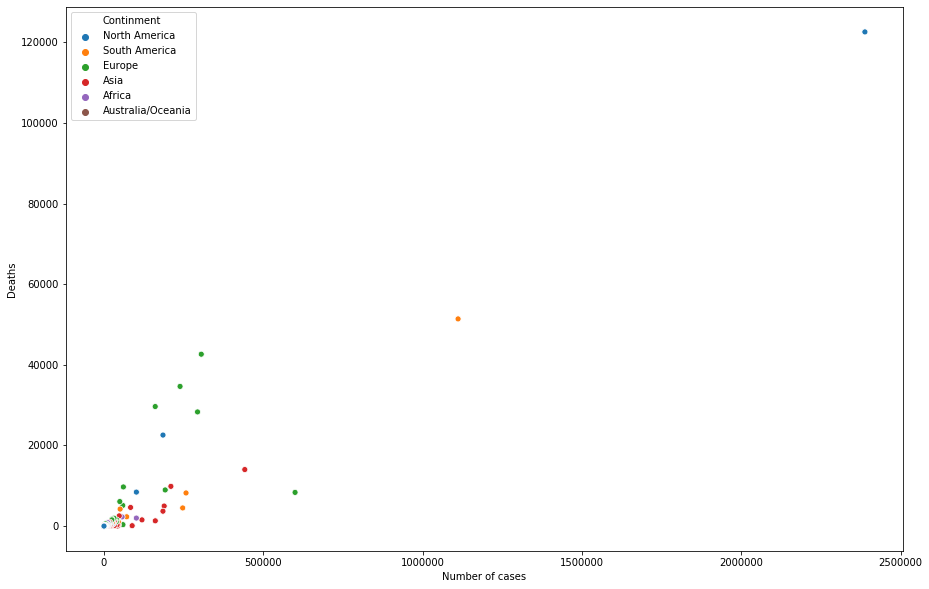

In [261]:
#21 .Change the minimum and maximum point size and show all sizes in legend:
sns.scatterplot(x="Number of cases", y="Deaths",hue="Continment",data=dfff)


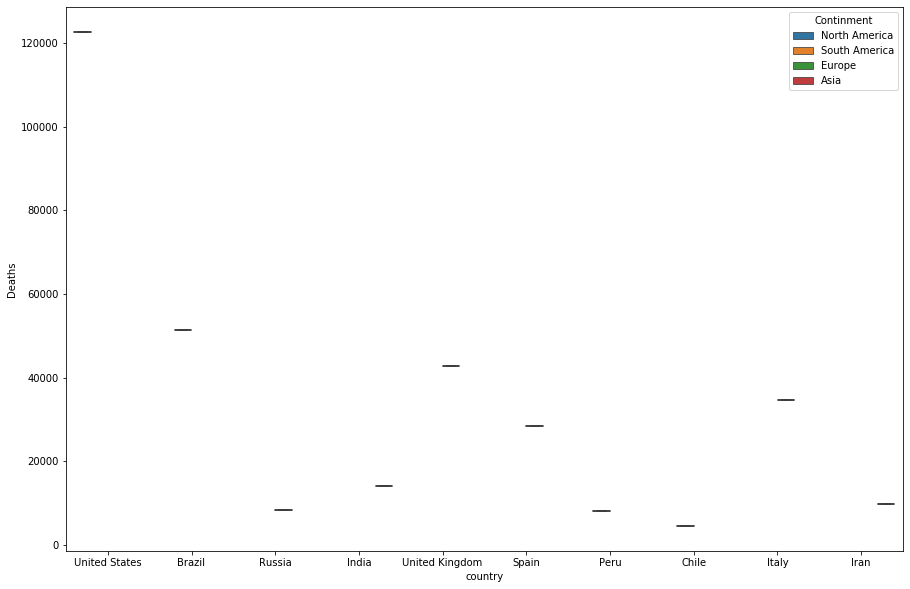

In [262]:
sns.boxplot(x='country',y='Deaths',data=dfff.head(10),hue='Continment')


In [263]:
dfg=dfff.groupby(by='Continment',as_index=False).agg({'Number of cases':sum,'Deaths':sum})
dfgg=dfg[1:]

In [264]:
df1=dfgg.sort_values(by='Number of cases',ascending=False)

In [265]:
df1['Death_rate']=(df1['Deaths']/df1['Number of cases'])*100

In [266]:
df1.sort_values(by='Death_rate',ascending=False)

,Continment,Number of cases,Deaths,Death_rate
4,Europe,2336525,188171.0,8.053455
5,North America,2775029,156229.0,5.629815
6,South America,1817322,72629.0,3.996485
1,Africa,318792,8374.0,2.626791
2,Asia,1959358,49431.0,2.522816
3,Australia/Oceania,9115,124.0,1.360395


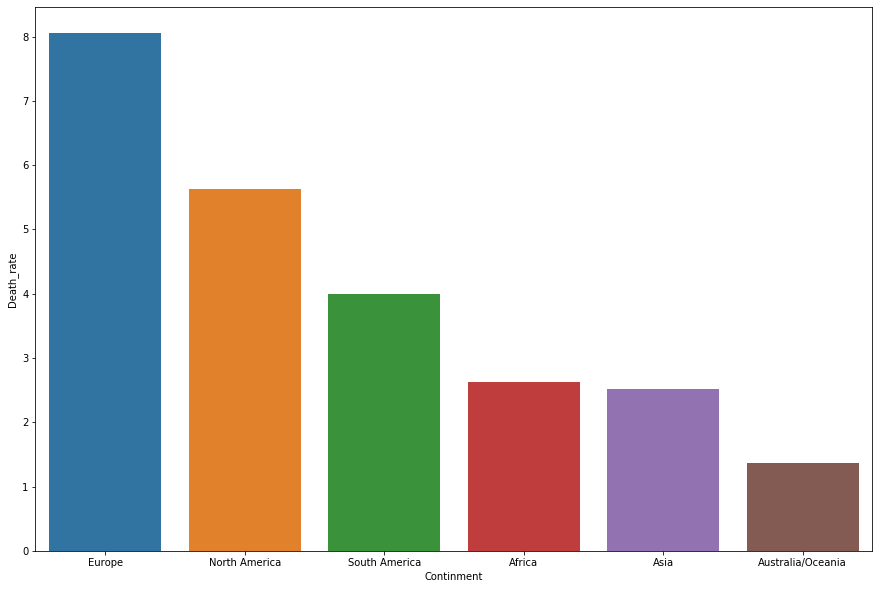

In [267]:
sns.barplot(x='Continment',y='Death_rate',data=df1.sort_values(by='Death_rate',ascending=False))

# Table

In [268]:
import texttable as tt

In [269]:
# create texttable object 

table = tt.Texttable() 
table.add_rows([(None, None, None, None)] + data)  # Add an empty row at the beginning for the headers 
table.set_cols_align(('c', 'c', 'c', 'c'))  # 'l' denotes left, 'c' denotes center, and 'r' denotes right 
table.header((' Country ', ' Number of cases ', ' Deaths ', ' Continent ')) 
  
print(table.draw()) 

+---------------------------+-------------------+----------+-------------------+
|          Country          |  Number of cases  |  Deaths  |     Continent     |
+===========================+===================+==========+===================+
|          Cyprus           |        988        |    19    |       Asia        |
+---------------------------+-------------------+----------+-------------------+
|         Barbados          |        97         |    7     |   North America   |
+---------------------------+-------------------+----------+-------------------+
|           Yemen           |        967        |   257    |       Asia        |
+---------------------------+-------------------+----------+-------------------+
|        Cabo Verde         |        944        |    8     |      Africa       |
+---------------------------+-------------------+----------+-------------------+
|          Georgia          |        911        |    14    |       Asia        |
+---------------------------